## We repeat what we did in ForceError.ipynb for the Mirror Lab data.
## and see how things changed between Mirror Lab and the summit

In [6]:
from M1M3tools import *
from datetime import datetime
from datetime import timedelta
from datetime import timezone
import os
import yaml

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Circle

plt.style.use('classic')

%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#These are time stamps we used for the mirror Lab analysis. We keep them for comparison.
# these are in utc already.
myt0 = [1, 25, 17, 54] #33/28nm surfaces
myt1 = [1,14,22,38] #a random time we grabbed from 190118.ipynb
myt2 = [1,18,16,48]

#for summit test
# I eventually found this time stamp to be useable for my purpose.
myts = [11, 5, 10, 0]

#### Data from test campaign 2 could NOT be used, because the measured forces were truncated. What about on the summit? Was it truncated too? Great! The answer is no. See below.

In [3]:
df7 = get_dataframe_EFD(myts, 'm1m3_ForceActuatorData')
myf7 = assembleFinst(df7, 3, 1)

-------Reading from efdData/MeasuredForces_191105_1000.csv-------------


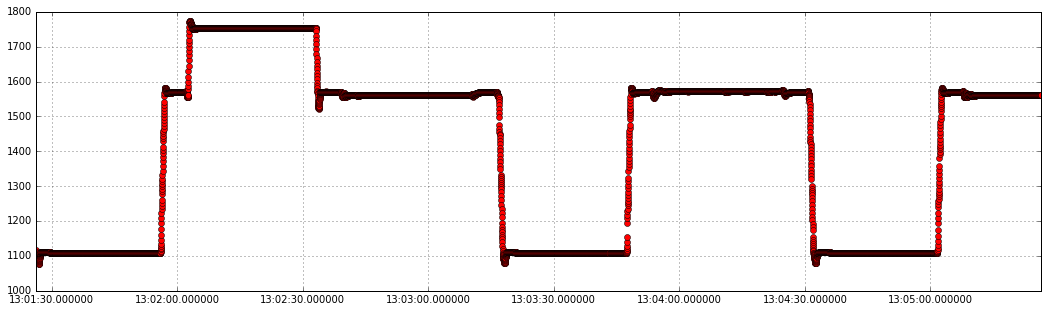

In [7]:
iact = 12 #a random actuator
idxU = np.logical_and(df7.private_sndStamp>= df7.private_sndStamp[0], 
                      df7.private_sndStamp<= df7.private_sndStamp[0]+240)
fig, ax = plt.subplots(figsize = (18,5))
ax.plot(pd.to_datetime(df7.private_sndStamp[idxU], unit='s'),myf7[idxU,iact,3],'ro',label='measured')
ax.grid()

### We will just use a segment of this, where things seem to be stable.

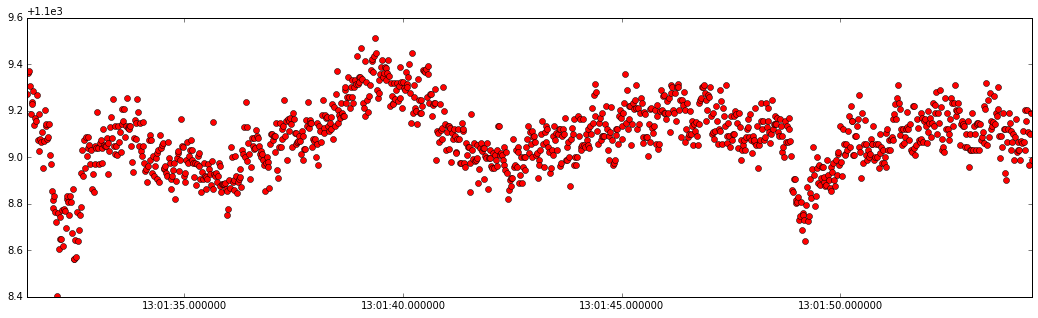

In [9]:
iact = 12
tstart = df7.private_sndStamp[0]+5
tend = df7.private_sndStamp[0]+28
idxU = np.logical_and(df7.private_sndStamp>= tstart, 
                      df7.private_sndStamp<= tend)
fig, ax = plt.subplots(figsize = (18,5))
plt.plot(pd.to_datetime(df7.private_sndStamp[idxU], unit='s'),myf7[idxU,iact,3],'ro',label='measured');

In [11]:
len(df7['ZForce'][0].split())

156

In [12]:
# Unlike the Mirror Lab EFD, it looks like this is in order, great!
df7.private_sndStamp[:10]-df7.private_sndStamp[0]

0    0.000000
1    0.020011
2    0.040062
3    0.059932
4    0.080162
5    0.099982
6    0.120147
7    0.140019
8    0.160021
9    0.180166
Name: private_sndStamp, dtype: float64

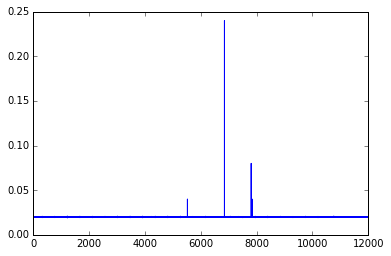

In [13]:
plt.plot(np.array(df7.private_sndStamp[1:])-np.array(df7.private_sndStamp[:-1]));

#### We load data from Mirror Lab campaign 1.
When csv files exist, the below will just load the csv files, without trying to connect to EFD.

In [14]:
df1 = get_dataframe_EFD(myt0, table_name = 'm1m3_ForceActuatorData')
df2 = get_dataframe_EFD(myt0, table_name = 'm1m3_logevent_AppliedForces')
df3 = get_dataframe_EFD(myt1, table_name = 'm1m3_ForceActuatorData')
df4 = get_dataframe_EFD(myt1, table_name = 'm1m3_logevent_AppliedForces')
df5 = get_dataframe_EFD(myt2, table_name = 'm1m3_ForceActuatorData')
df6 = get_dataframe_EFD(myt2, table_name = 'm1m3_logevent_AppliedForces')

-------Reading from efdData/MeasuredForces_190125_1754.csv-------------
-------Reading from efdData/AppliedForces_190125_1754.csv-------------
-------Reading from efdData/MeasuredForces_190114_2238.csv-------------
-------Reading from efdData/AppliedForces_190114_2238.csv-------------
-------Reading from efdData/MeasuredForces_190118_1648.csv-------------
-------Reading from efdData/AppliedForces_190118_1648.csv-------------


In [60]:
df7 = get_dataframe_EFD(myts, table_name = 'm1m3_ForceActuatorData')
df8 = get_dataframe_EFD(myts, table_name = 'm1m3_logevent_AppliedForces')
df8b = get_dataframe_EFD(myts, 'm1m3_logevent_AppliedBalanceForces')

tstart = df7.private_sndStamp[0]+5 + 3 #addtional 3 seconds, to make sure things have settled completely
tend = df7.private_sndStamp[0]+28
idxU = np.logical_and(df7.private_sndStamp>= tstart, 
                      df7.private_sndStamp<= tend)
df7 = df7[idxU]
idxU = np.logical_and(df8.private_sndStamp>= tstart, 
                      df8.private_sndStamp<= tend)
df8 = df8[idxU]
idxU = np.logical_and(df8b.private_sndStamp>= tstart, 
                      df8b.private_sndStamp<= tend)
df8b = df8b[idxU]

df7 = df7.reset_index(drop=True)
df8 = df8.reset_index(drop=True)
df8b = df8b.reset_index(drop=True)

-------Reading from efdData/MeasuredForces_191105_1000.csv-------------
-------Reading from efdData/AppliedForces_191105_1000.csv-------------
-------Reading from efdData/AppliedBalanceForces_191105_1000.csv-------------


In [40]:
myf1 = assembleFinst(df1, 1, 1)
myf2 = assembleFinst(df2, 1, 1)
myf3 = assembleFinst(df3, 1, 1)
myf4 = assembleFinst(df4, 1, 1)
myf5 = assembleFinst(df5, 1, 1)
myf6 = assembleFinst(df6, 1, 1)

In [61]:
myf7 = assembleFinst(df7, 3, 1)
myf8 = assembleFinst(df8, 3, 1)
myf8b = assembleFinst(df8b, 3, 1)

#### Unfortunately the two force tables STILL have different number of messages.

In [62]:
print(myf7.shape, myf8.shape)

(1000, 156, 4) (994, 156, 4)


#### The timestamps for sending the messages were different! So we cannot do a simple element-wise subtraction

#### We set the earliest time stamp to be t=0, and latest time stamp to be tmax. After that we bin the data using the time stamps. 
In example below we choose time interval for averaging to be 1 second.
fdiff is the force difference after binning the data.

In [63]:
def get_fdiff_from_myf12(df1, df2, campn = 1, dt=1):
    myf1 = assembleFinst(df1, campn, 1)
    myf2 = assembleFinst(df2, campn, 1)
    
    t0 = min(min(df1.private_sndStamp), min(df2.private_sndStamp))
    tmax = max(max(df1.private_sndStamp), max(df2.private_sndStamp))-t0
    t1 = np.array(df1.private_sndStamp - t0)
    t2 = np.array(df2.private_sndStamp - t0)
    nt = int(np.ceil(tmax/dt))
    fdiff = np.zeros((nt, nActuator, 4))
    for it in range(nt):
        idx1 = np.logical_and(t1>dt*it, t1<dt*(it+1)) #time binning
        idx2 = np.logical_and(t2>dt*it, t2<dt*(it+1)) #time binning
        if np.any(idx1) == True and np.any(idx2) == True:
            fdiff[it,:,:] = np.mean(myf1[idx1,:,:], axis=0) - np.mean(myf2[idx2,:,:], axis=0)
        else:
            fdiff[it,:,:] = np.nan
    fdiff[:,:,0] = actID  #checked fdiff[:2,:,0]. This is OK.
    idxx = ~(np.logical_and(myf1[0,:,1]==0, myf2[0,:,1]==0))#which actuators have x force
    idxy = ~(np.logical_and(myf1[0,:,2]==0, myf2[0,:,2]==0))#which actuators have y force
    fdiff[:,~idxx,1] = np.nan
    fdiff[:,~idxy,2] = np.nan
    return fdiff

In [44]:
fdiff1 = get_fdiff_from_myf12(df1, df2, campn=1)
fdiff2 = get_fdiff_from_myf12(df3, df4, campn=1)
fdiff3 = get_fdiff_from_myf12(df5, df6, campn=1)

In [64]:
fdiff4 = get_fdiff_from_myf12(df7, df8, campn=3)

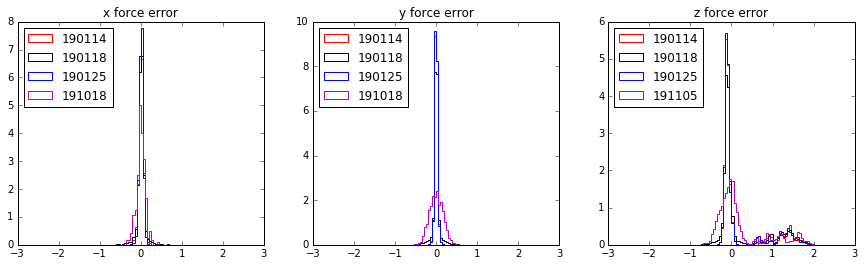

In [65]:
xbin = np.linspace(-2.5,2.5,101)
idxx = ~(np.logical_and(myf1[0,:,1]==0, myf2[0,:,1]==0))#which actuators have x force
idxy = ~(np.logical_and(myf1[0,:,2]==0, myf2[0,:,2]==0))#which actuators have y force

fig, ax = plt.subplots(1, 3, figsize = (15,4))

idx = ~np.isnan(fdiff2[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
ax[0].hist(fdiff2[np.ix_(idx,idxx)][:,:,1].reshape(-1,1), bins=xbin, color='r',histtype='step', density=True, label='190114')
ax[1].hist(fdiff2[np.ix_(idx,idxy)][:,:,2].reshape(-1,1), bins=xbin, color='r',histtype='step', density=True, label='190114')
ax[2].hist(fdiff2[idx,:,3].reshape(-1,1), bins=xbin, color='r',histtype='step', density=True, label='190114')

idx = ~np.isnan(fdiff3[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
ax[0].hist(fdiff3[np.ix_(idx,idxx)][:,:,1].reshape(-1,1), bins=xbin, color='k',histtype='step', density=True, label='190118')
ax[1].hist(fdiff3[np.ix_(idx,idxy)][:,:,2].reshape(-1,1), bins=xbin, color='k',histtype='step', density=True, label='190118')
ax[2].hist(fdiff3[idx,:,3].reshape(-1,1), bins=xbin, color='k',histtype='step', density=True, label='190118')

idx = ~np.isnan(fdiff1[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
ax[0].hist(fdiff1[np.ix_(idx,idxx)][:,:,1].reshape(-1,1), bins=xbin, color='b',histtype='step', density=True, label='190125')
ax[1].hist(fdiff1[np.ix_(idx,idxy)][:,:,2].reshape(-1,1), bins=xbin, color='b',histtype='step', density=True, label='190125')
ax[2].hist(fdiff1[idx,:,3].reshape(-1,1), bins=xbin, color='b',histtype='step', density=True, label='190125')

idx = ~np.isnan(fdiff4[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
ax[0].hist(fdiff4[np.ix_(idx,idxx)][:,:,1].reshape(-1,1), bins=xbin, color='m',histtype='step', density=True, label='191018')
ax[1].hist(fdiff4[np.ix_(idx,idxy)][:,:,2].reshape(-1,1), bins=xbin, color='m',histtype='step', density=True, label='191018')
ax[2].hist(fdiff4[idx,:,3].reshape(-1,1), bins=xbin, color='m',histtype='step', density=True, label='191105')

ax[0].set_title('x force error')
ax[1].set_title('y force error')
ax[2].set_title('z force error')
for i in range(3):
    ax[i].legend(loc='upper left')

#### We did not use much x or y forces at zenith pointing. They look OK. z-forces have some large differences.
Below we first verify that these large differences are real - indeed in the data.

In [66]:
np.max(fdiff4[idx,:,3])

1.986545459999661

In [67]:
idxt = np.where(fdiff4[:,:,3]>1.8)

In [68]:
idxt

(array([ 1,  1,  1,  2,  2,  2,  3,  3,  5,  5,  6,  6,  7,  7,  7,  7,  8,
         8,  8,  8,  8,  9,  9, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15,
        15, 15, 15, 16, 17, 17, 18, 18, 19, 19]),
 array([ 39,  40, 153,  39,  40, 152,  39,  40,  39,  40,  39,  40,  39,
         40, 153, 154,  39,  40, 119, 152, 154,  39,  40,  40,  39,  40,
         39,  40,  39,  40, 153,  39,  40,  39,  40, 119, 154,  40,  39,
         40,  39,  40,  39,  40]))

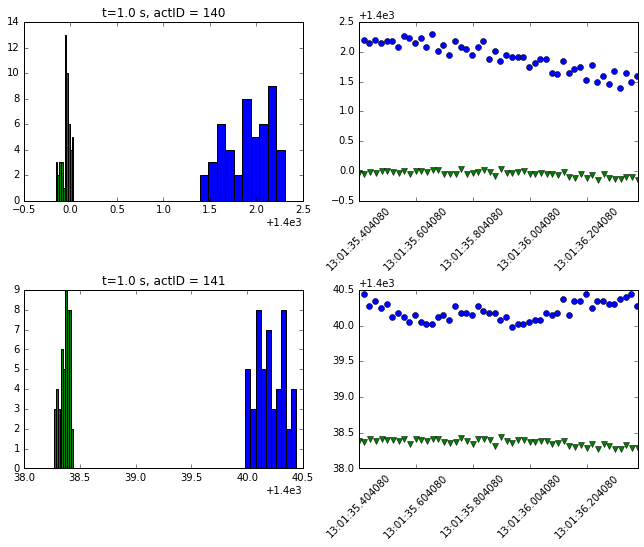

In [94]:
t0 = min(min(df7.private_sndStamp), min(df8.private_sndStamp))
tmax = max(max(df7.private_sndStamp), max(df8.private_sndStamp))-t0
t1 = np.array(df7.private_sndStamp - t0)
t2 = np.array(df8.private_sndStamp - t0)
t3 = np.array(df8b.private_sndStamp - t0)

dt = 1 #1 second interval
nt = int(np.ceil(tmax/dt))

fig, ax = plt.subplots(2, 2, figsize = (11,8))
plt.subplots_adjust(hspace=0.5)
for i in range(2):
    it = idxt[0][i]
    iact = idxt[1][i] #index in the table starts with 1, not 0
    idx1 = np.logical_and(t1>dt*it, t1<dt*(it+1))
    idx2 = np.logical_and(t2>dt*it, t2<dt*(it+1))


    ax[i][0].hist(myf7[idx1, iact, 3])
    ax[i][0].hist(myf8[idx2, iact, 3])
    ax[i][1].plot(pd.to_datetime(df7.private_sndStamp[idx1], unit='s'),myf7[idx1,iact,3],'o')
    ax[i][1].plot(pd.to_datetime(df8.private_sndStamp[idx2], unit='s'),myf8[idx2,iact,3],'v')
    ax[i][0].set_title('t=%.1f s, actID = %d'%(it*dt, actID[iact]))
    plt.setp( ax[i][1].xaxis.get_majorticklabels(), rotation=45 )
    #plt.xticks(rotation=45)

### The full picture of what happended in these 20 seconds

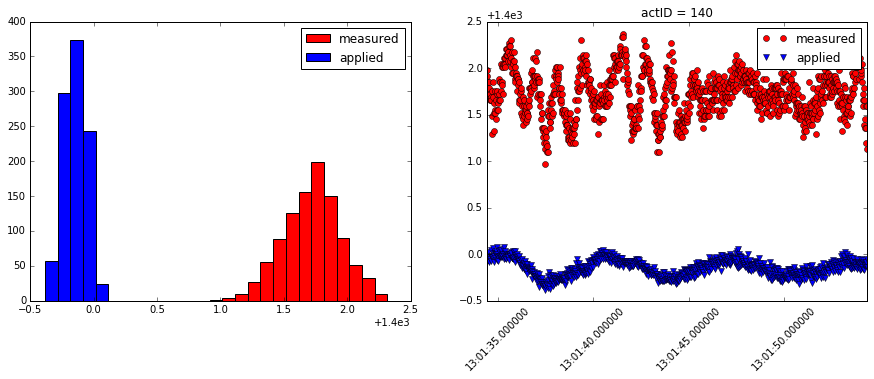

In [91]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplots_adjust(hspace=0.5)
iact = idxt[1][0] #look at the same actuator as before
ts = 0
te = ts+240
idx1 = np.logical_and(t1>ts, t1<te)
idx2 = np.logical_and(t2>ts, t2<te)

bins = np.arange(min(min(myf7[idx1, iact, 3]), min(myf8[idx2, iact, 3])), 
                 max(max(myf7[idx1, iact, 3]), max(myf8[idx2, iact, 3])),0.1)
ax[0].hist(myf7[idx1, iact, 3],bins,color='r',label='measured')
ax[0].hist(myf8[idx2, iact, 3],bins,color='b',label='applied')
ax[1].plot(pd.to_datetime(df7.private_sndStamp[idx1], unit='s'),myf7[idx1,iact,3],'ro',label='measured')
ax[1].plot(pd.to_datetime(df8.private_sndStamp[idx2], unit='s'),myf8[idx2,iact,3],'vb',label='applied')
plt.setp( ax[1].xaxis.get_majorticklabels(), rotation=45 );
ax[1].set_title('actID = %d'%(actID[iact]))
ax[0].legend()
ax[1].legend()

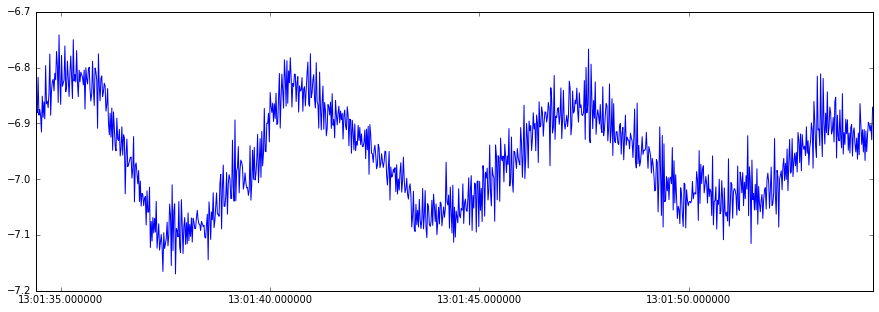

In [107]:
# the oscillation in the applied force is due to FB
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(pd.to_datetime(df8b.private_sndStamp[:], unit='s'),myf8b[:,iact,3])

#### Are some actuators worse than others? Yes, there are systematic difference, which are small though.
#### Are they changing over time? Not much
#### The behavior of the individual actuators still follows previous results. But they are a bit NOISER!

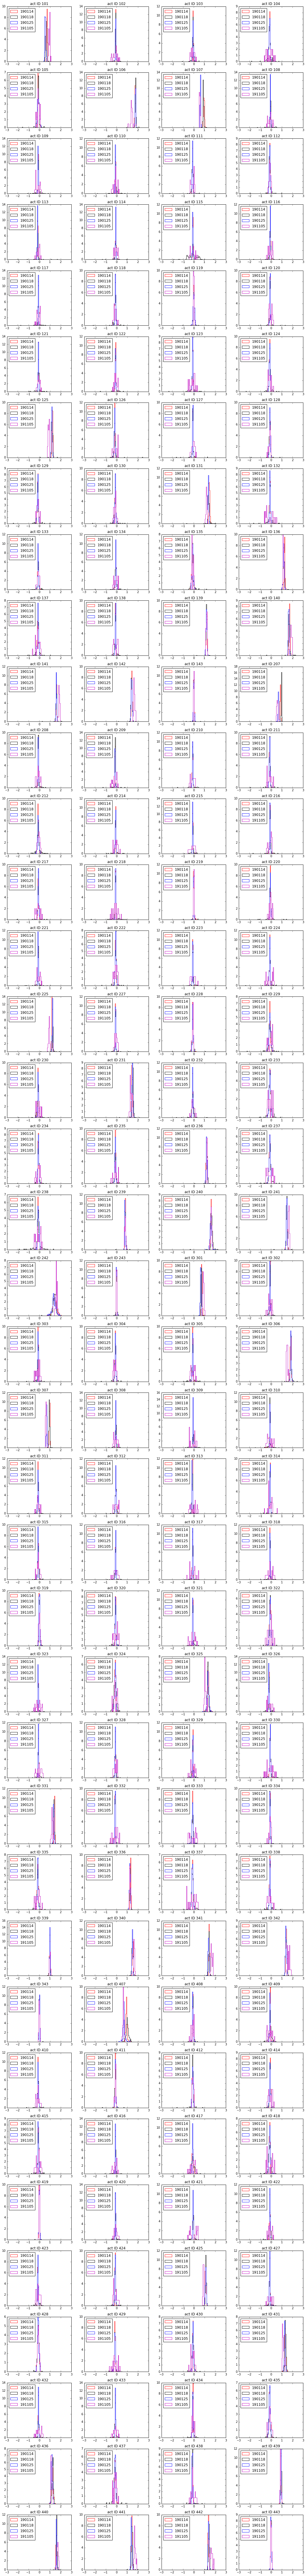

In [109]:
fig, ax = plt.subplots(39, 4, figsize = (18,4*39))
for i in range(nActuator):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    idx = ~np.isnan(fdiff2[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
    ax[irow][icol].hist(fdiff2[idx,i,3].reshape(-1,1), bins=xbin, color='r',histtype='step', density=True, label='190114')
    idx = ~np.isnan(fdiff3[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
    ax[irow][icol].hist(fdiff3[idx,i,3].reshape(-1,1), bins=xbin, color='k',histtype='step', density=True, label='190118')
    idx = ~np.isnan(fdiff1[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
    ax[irow][icol].hist(fdiff1[idx,i,3].reshape(-1,1), bins=xbin, color='b',histtype='step', density=True, label='190125')    
    idx = ~np.isnan(fdiff4[:,np.argmax(idxx),1]) #for 1st dimension: there are empty bins even after binning by dt=1s.
    ax[irow][icol].hist(fdiff4[idx,i,3].reshape(-1,1), bins=xbin, color='m',histtype='step', density=True, label='191105')    

    ax[irow][icol].set_title('act ID %d'%actID[i])
    ax[irow][icol].legend(loc='upper left')